In [ ]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
from google.colab import files
!pip install progress
from progress.bar import Bar
import re
from nltk.stem.snowball import SnowballStemmer
from tqdm.notebook import tqdm
import random
!pip install pymetamap
import pymetamap
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textwrap3
import textwrap

  Created wheel for progress: filename=progress-1.5-cp37-none-any.whl size=8088 sha256=0720e5645b97c56e61527a42b4fd8b9a9b23b5f6a1bec5893add0f98e956690a
  Stored in directory: /root/.cache/pip/wheels/6c/c8/80/32a294e3041f006c661838c05a411c7b7ffc60ff939d14e116
Successfully built progress
  Created wheel for pymetamap: filename=pymetamap-0.1-cp37-none-any.whl size=6878 sha256=3f512f749c62f13489cf89b5ea3fb14a1babfdc296c4ef296eca79e598b8e884
  Stored in directory: /root/.cache/pip/wheels/72/5e/90/86dcf22ae069aba9236fb9ee0e9a337d54babab5990ddfd8f3
Successfully built pymetamap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
infile1 = open("/content/drive/My Drive/Research project/Data/metamap_all_data.pickle",'rb')
metamap_file1 = pickle.load(infile1)
infile1.close()
len(metamap_file1)

21319

In [ ]:
infile2 = open("/content/drive/My Drive/Research project/Data/metamap_all_data_addition.pickle",'rb')
metamap_file2 = pickle.load(infile2)
infile2.close()
len(metamap_file2)

14607

In [ ]:
metamap_file1[0]

['2020_5',
 'medic  dispatched priority  breathing problem rfd dispatched arrived to find  year old male conscious and breathing laying the sofa in the living room of the residence no obvious signs of distress or immediate life threats no delays in response or treatments prior to arrival rfd on scene patient complains of acute onset of generalized abdominal pain and shortness of breath per faces scale   pain abdomen is distended but soft guarding and tenderness upon palpation of the lower quadrants patient is breathing is unlabored and lung sounds are clear room air saturation is low family indicates that the patient has had similar episodes prior to today no other symptoms or pain noted limited pmh medications and allergies no etoh drug use patient interview is limited due to language barrier patient presents as alert and oriented x  gcs  e v m with a patent airway skin is warm pink and dry assessment of the head notes no abnormalities no drainage or discharge from eyes ears nose or m

In [ ]:
merge={'labored breathing':'respiratory distress',
       'dyspnea':'respiratory distress',
        'increased work of breathing':'respiratory distress',
       'respiratory failure':'respiratory distress',
       'out of breath':'respiratory distress',
       'increasing breathlessness':'respiratory distress',
       'expiratory wheezing':'wheezing',
       'inspiratory wheezing':'wheezing',
       'left sided chest pain':'chest pain',
        'sharp chest pain':'chest pain',
        'chest pain on breathing':'chest pain',
        'right sided chest pain':'chest pain',
        'central chest pain':'chest pain',
        'radiating chest pain':'chest pain',
        'dull chest pain':'chest pain',
        'crushing chest pain':'chest pain',
        'generalized chest pain':'chest pain',
        'upper chest pain':'chest pain',
        'localized chest pain':'chest pain',
        'acute chest pain':'chest pain',
        'noncardiac chest pain':'chest pain',
        'chest pain angina':'chest pain',
        'chest pain on exertion':'chest pain',
        'chronic chest pain':'chest pain',
        'chest pain at rest':'chest pain',
        'central crushing chest pain':'chest pain',
       'asthma attack':'asthma',
        'asthma with copd':'asthma',
        'asthmatic bronchitis':'asthma',
        'allergic asthma':'asthma',
        'asthma chronic':'asthma',
        'asthmatic breathing':'asthma',
        'seasonal asthma':'asthma',
        'acute asthma':'asthma',
        'asthma exerciseinduced':'asthma',
        'childhood asthma':'asthma',
       'severe vertigo':'vertigo',
        'vertigo constant':'vertigo',
        'vertigo dizziness':'vertigo',
        'nocturnal vertigo':'vertigo',
       'hypertensive nephropathy':'hypertensive disease',
    'hypertensive episode':'hypertensive disease',
    'hypertensive urgency':'hypertensive disease',
    'diastolic hypertension':'hypertensive disease',
    'essential hypertension':'hypertensive disease',
    'renal hypertension':'hypertensive disease',
    'systolic hypertension':'hypertensive disease',
    'prehypertension':'hypertensive disease',
    'genetic hypertension':'hypertensive disease',
    'endocrine hypertension':'hypertensive disease',
    'intermittent hypertension disorder':'hypertensive disease',
    'white coat hypertension':'hypertensive disease',
   ' old myocardial infarction':'myocardial infarction',
    'acute myocardial infarction':'myocardial infarction',
    'inferior wall myocardial infarction':'myocardial infarction',
    'acute st segment elevation myocardial infarction disorder':'myocardial infarction',
    'first myocardial infarction':'myocardial infarction',
    'acute anterior wall myocardial infarction':'myocardial infarction',
    'anterior myocardial infarction':'myocardial infarction',
    'old anterior myocardial infarction':'myocardial infarction',
    'myocardial ischemia':'myocardial infarction',
    'silent myocardial infarction':'myocardial infarction',
    'acute inferior myocardial infarction':'myocardial infarction',
    'dyspnea on exertion':'dyspnea',
    'dyspnea acute':'dyspnea',
    'dyspnea paroxysmal':'dyspnea',
    'expiratory dyspnea':'dyspnea',
    'actual resting dyspnea':'dyspnea',
    'nausea or abdominal pain':'abdominal pain',
    'generalized abdominal pain':'abdominal pain',
    'abdominal pain through to back':'abdominal pain',
    'lower abdominal pain':'abdominal pain',
    'right sided abdominal pain':'abdominal pain',
    'upper abdominal pain':'abdominal pain',
    'abrupt abdominal pain':'abdominal pain',
    'intermittent abdominal pain':'abdominal pain',
    'left sided abdominal pain':'abdominal pain',
    'acute abdominal pain':'abdominal pain',
    'localized abdominal pain':'abdominal pain',
    'central abdominal pain':'abdominal pain',
    'chronic abdominal pain':'abdominal pain',
    'type of abdominal pain':'abdominal pain',
    'site of abdominal pain':'abdominal pain',
    'abdominal pain in pregnancy':'abdominal pain',
    'generalized abdominal pain cramps':'abdominal pain',
    'diarrhea and vomiting symptom':'vomiting',
    'vomiting of medication':'vomiting',
    'projectile vomiting':'vomiting',
    'cyclical vomiting syndrome disorder':'vomiting',
    'coffee ground vomiting':'vomiting',
    'morning vomiting':'vomiting',
    'persistent vomiting':'vomiting',
    'intermittent vomiting':'vomiting',
    'intractable vomiting':'vomiting',
    'vomiting reflex':'vomiting',
    'feeling like vomiting':'vomiting',
    'chronic vomiting':'vomiting',
    'copd exacerbation':'chronic obstructive pulmonary disease',
    'copd bronchitis':'chronic obstructive pulmonary disease',
    'chronic obstructive pulmonary disease of horses':'chronic obstructive pulmonary disease',
    'morning nausea':'nausea',
    'sensation of nausea':'nausea',
    'nausea chronic':'nausea',
    'chronic obstructive airway disease':'chronic obstructive pulmonary disease',
    'diabetic hypoglycemia':'hypoglycemia',
    'hypoglycemia acute':'hypoglycemia',
    'other hypoglycemia':'hypoglycemia',
    'nondiabetic hypoglycemia':'hypoglycemia',
   'disorder characterized by fever':'fever',
'cough with fever':'fever',
'fever with chills':'fever',
'ephemeral fever':'fever',
'phlebotomus fever':'fever',
'feeling feverish':'fever',
'hay fever':'fever',
'rocky mountain spotted fever':'fever',
'sweating fever':'fever',
'yellow fever':'fever',
'slight fever':'fever',
'fever with rash':'fever',
'acute onset fever':'fever',
  'numbness of hand':'numbness',
'numbness of face':'numbness',
'numbness of limbs':'numbness',
'numbness of finger':'numbness',
'numbness throat':'numbness',
'numbness of foot':'numbness',
'numbness of toe':'numbness',
'numbness of head':'numbness',
'numbness of upper limb':'numbness',
'numbness of upper arm':'numbness',
'numbness in shoulder':'numbness',
'numbness of skin':'numbness',
'numbness of tongue':'numbness',
'upper extremity numbness left':'numbness',
'acute onset of confusion':'confusion',
'allergic reaction type':'allergic reaction',
'allergic reaction to bee sting':'allergic reaction',
'acute allergic reaction':'allergic reaction',
'chest discomfort':'chest pain',
'chest pressure':'chest pain',
'tonic clonic seizures':'seizure',
'epilepsy':'seizure',
'seizures':'seizure',
'old myocardial infarction':'myocardial infarction',
'productive cough':'cough',

'bronchial breathing':'bronchitis',
'bronchial spasm':'bronchitis',
'bronchitis chronic':'bronchitis',
'emphysematous bronchitis':'bronchitis',
'bronchopulmonary dysplasia':'bronchitis',
'acute bronchospasm':'bronchitis',
'acute bronchitis':'bronchitis',
'bronchiolitis obliterans':'bronchitis',
'bronchiolitis':'bronchitis',
'bronchiectasis':'bronchitis',
'bronchiolitis obliterans organizing pneumonia':'bronchitis',
'acute viral bronchitis':'bronchitis',

'generalized urticaria':'urticaria',
'autoimmune urticaria':'urticaria',
'clouded consciousness':'confusion',
'disturbance of consciousness':'confusion',
  'septicemia':'sepsis',
  'dry cough':'coughing',
  'anaphylaxis non medication':'anaphylaxis',
  'diabetes mellitus':'diabetes'


       }

##2. Extract information

In [ ]:
def text_remove_double_space(text):
    text=text.lower()
    res=''
    for word in text.split():
        res=res+word+' '
    return res.strip()

In [ ]:
remove_list=['oxygen', 'aspirin', 'aspirin','asa', 'midazolam', 'versed', 'saline' 'ondansetron', 'zofran', 'naloxone', 'narcan', 'albuterol', 'proventil', 'ipratropium', 'atroventdexamethasone', 'magnesium', 'fentanyl', 'dexamethasone', 'glucagon', 'glucagen', 'glucose', 'dextrose', 'sodium bicarbonate','sodium','bicarbonate' 'diphenhydramine', 'benadryl', 'nitroglycerin', 'furosemide', "lactated ringer's solution", 'lactated','ringer','haldol', 'adenosine', 'adenocard', 'amiodarone', 'cordarone', 'atropine', 'calcium chloride', 'oxymetazoline', 'afrin', 'epipen', 'norepinephrine', 'levophed', 'ketorolac', 'toradol', 'racemic epinephrine', 'epinephrine', 'terbutaline sulfate', 'terbutaline', 'sulfatenicardipine', 'cardene', 'propofol injection [diprivan]', 'propofol', 'diprivan', 'norepinephrine injection [levophed]', 'norepinephrine', 'levophedgeneric medication placeholder','levophedgeneric', 'potassium chloride','potassium', 'lorazepam', 'ativan', 'metoprolol', 'lopresser', 'promethazine', 'phenergan', 'nitroprusside', 'nitropress', 'diprivan', 'ketamine', 'ketalar', 'morphine', 'albuterol', 'ipratropium', 'duoneb', 'insulin', 'phenylephrine ', 'neo-synephrine', 'etomidate', 'amidate', 'succinylcholine', 'anectine', 'rocuronium', 'zemuron', 'precedex', 'ziprasidone', 'geodon', 'hydroxocobalamin', 'cyanokit', 'phenytoin', 'dilantin', 'acetaminophen', 'tylenol', 'methylprednisolone', 'solu-medrol', 'calcium gluconate', 'diltiazem', 'cardizem', 'labetalol', 'normodyne', 'levalbuterol', 'xopenex', 'dexamethasone', 'decadron', 'ziprasidone', 'geodon', 'furosemide', 'lasix', 'propofol', 'diprivan', 'dopamine', 'glutose', 'calcium chloride', 'antibiotics', 'heparin', 'neo-synephrine','synephrine', 'diazepam', 'valium', 'lidocaine', 'dobutamine', 'cyanokit', 'alteplase', 'activase', 'enoxaparin', 'hydralazine', 'apresoline']
semantic_type=['sosy','dsyn']

def removeNumber(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
def removechar(sentence):
    text=""
    for word in sentence.split():
        if len(word)>1:
            text+=word+' '
    return text
def removePunctuation(sentence): 
    sentence = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.strip()
    sentence = sentence.replace("\n"," ")
    return sentence
#check if this concept is what we want
def check(concept,semantic_type):
    
    if concept[1]=='AA' or concept[6][-2]=='1':
        return False,""
    type=concept[5]
    type=type.replace('[','')
    type=type.replace(']','')
        
    for split in type.split(','):
        if split not in semantic_type:
            return False,"";   
    concept_name=concept[3].lower()
    concept_name=removePunctuation(concept_name)
    concept_name=removechar(concept_name)
    concept_name=removeNumber(concept_name)
    for word in concept_name.split():
        if word in remove_list:
            return False,""
    return True,concept_name.lower()

In [ ]:
CUI_Concept_list={}

In [ ]:
def createConceptListForEachData(concepts):
    output=""
    for each_concept in concepts:
        boo,concept_name=check(each_concept,semantic_type)
        if boo==True:  
            #if 'vomiting' in concept_name and 'nausea' in concept_name:
             #   output+='vomiting;'+'nausea;'
            #if concept_name in merge:
             #   concept_name=merge[concept_name]
            output+=concept_name+';'
            cui=each_concept[4]
            CUI_Concept_list[cui]=concept_name
            #break
            
    if len(output)!=0:
        return output[:-1]
    return output


##3.Conditional probability between signs/symptoms and medication

In [ ]:
metamap_file=metamap_file1
df_metamap_narrative=[]
df_medical=[]

with tqdm(total=len(metamap_file),  bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    for i in range(0,len(metamap_file)):
        metamap=metamap_file[i]
        metamap_concept=createConceptListForEachData(metamap[4])
        if len(metamap_concept.strip())==0:
            pbar.update(1)
            continue
        medical=text_remove_double_space(metamap[2])
        df_metamap_narrative.append(metamap_concept)
        df_medical.append(medical)
        pbar.update(1)

In [ ]:
sign_symptom_idx_dict={}
idx_sign_symptom_dict={}
sign_symptom_cnt={}
i=0
for each in df_metamap_narrative:
    for sign in each.split(';'):
        if sign not in sign_symptom_idx_dict:
            sign_symptom_idx_dict[sign.strip()]=i
            idx_sign_symptom_dict[i]=sign.strip()
            i+=1
        if sign not in sign_symptom_cnt:
            sign_symptom_cnt[sign]=1
        else:
            sign_symptom_cnt[sign]+=1
sign_symptom_cnt={k: v for k, v in sorted(sign_symptom_cnt.items(), key=lambda item: item[1],reverse=True)}

medication_idx_dict={}
idx_medication_dict={}
medication_cnt={}
i=0
for each in df_medical:
    for medication in each.split(';'):
        if medication not in medication_idx_dict:
            medication_idx_dict[medication.strip()]=i
            idx_medication_dict[i]=medication.strip()
            i+=1
            
        if medication not in medication_cnt:
            medication_cnt[medication]=1
        else:
            medication_cnt[medication]+=1
medication_cnt={k: v for k, v in sorted(medication_cnt.items(), key=lambda item: item[1],reverse=True)}
   

In [ ]:
sign_symptom_arr=np.zeros((len(df_metamap_narrative),len(sign_symptom_idx_dict))) # data size x signs and symptoms size
medication_arr=np.zeros((len(df_medical),len(medication_idx_dict)))
for i in range(0,len(df_metamap_narrative)):
    for medication in df_medical[i].split(';'):
        medication_arr[i][medication_idx_dict[medication.strip()]]+=1
    
    for sign in df_metamap_narrative[i].split(';'):
        sign_symptom_arr[i][sign_symptom_idx_dict[sign.strip()]]+=1

In [ ]:
top_10_medication=[]
top_10_medicaiton_idx={}
top_10_idx_medicaiton={}
i=0
for each in medication_cnt:
    if i==10:
        break
    top_10_medication.append(each)
    top_10_medicaiton_idx[each]=i
    top_10_idx_medicaiton[i]=each
    i+=1

In [ ]:
med_symptom_freq=np.zeros((10,len(sign_symptom_cnt)))

for medication in top_10_medicaiton_idx:
    med_arr=medication_arr[:,medication_idx_dict[medication]]
    i=top_10_medicaiton_idx[medication]
    for k in range(0,len(med_arr)):
        if med_arr[k]==0:
            continue     
        for sign in sign_symptom_idx_dict:
            j=sign_symptom_idx_dict[sign]
            sign_arr=sign_symptom_arr[:,j]
            if sign_arr[k]!=0:
                    med_symptom_freq[i][j]+=1

In [ ]:
sorted_prob={}
for i in range(0,len(med_symptom_freq)):
    lis={}
    med=top_10_idx_medicaiton[i]
    for j in range(0,len(med_symptom_freq[i])):
        sign=idx_sign_symptom_dict[j]
        lis[sign]=med_symptom_freq[i][j]
    lis={k: v for k, v in sorted(lis.items(), key=lambda item: item[1],reverse=True)}
    l={}
    cnt=0
    for each in lis:
        if cnt==10:
            break
        l[each]=lis[each]
        cnt+=1
    sorted_prob[med]=l

In [ ]:
considered_sign_symptom_list=['respiratory distress','hypertensive disease','vomiting','nausea','flushing','wheezing','chronic obstructive pulmonary disease','dizziness','asthma','coughing','cardiac arrest','abdominal pain','chest pain','seizures','agitation','myocardial infarction','rales','sinus tachycardia','hypoglycemia','weakness']
data=[]
for row_idx in range(0,len(top_10_medicaiton_idx)):
    each={}
    for sign in considered_sign_symptom_list:
        col_idx=sign_symptom_idx_dict[sign]
        if np.sum(med_symptom_freq[:,col_idx])==0:
            each[sign]=0
        else: 
            each[sign]=med_symptom_freq[row_idx][col_idx]/np.sum(med_symptom_freq[:,col_idx])
    data.append(each)

In [ ]:
row_name=[]
for each in top_10_medication :
    row_name.append(each)
df= pd.DataFrame(data, index =row_name)  
df = df[(df.T >= 0).any()]

In [ ]:
df.T

,oxygen (7806),aspirin (asa) (1191),normal saline (125464),albuterol (proventil) (435),naloxone (narcan) (7242),ipratropium (atrovent) (7213),"epi 1:10,000 (317361)",ondansetron (zofran) (26225),fentanyl (4337),midazolam (versed) (6960)
hypoglycemia,0.491667,0.041667,0.183333,0.025000,0.091667,0.025000,0.041667,0.058333,0.000000,0.041667
chest pain,0.183711,0.557113,0.078351,0.054227,0.011546,0.049897,0.002474,0.040825,0.014021,0.007835
hypertensive disease,0.290811,0.208333,0.121575,0.101884,0.046804,0.091895,0.029110,0.070205,0.021119,0.018265
weakness,0.289593,0.113769,0.296703,0.062056,0.039431,0.058824,0.018100,0.087266,0.018423,0.015837
myocardial infarction,0.187970,0.558897,0.097744,0.030075,0.015038,0.030075,0.025063,0.037594,0.010025,0.007519
wheezing,0.329315,0.016621,0.011324,0.328950,0.002009,0.304658,0.001096,0.004201,0.000365,0.001461
vomiting,0.195052,0.110472,0.211162,0.039701,0.065880,0.037975,0.019850,0.273015,0.028193,0.018700
nausea,0.140577,0.150764,0.197963,0.024788,0.025467,0.022750,0.002037,0.371138,0.055348,0.009168
dizziness,0.221857,0.187617,0.253283,0.073171,0.030019,0.071764,0.000469,0.121482,0.025797,0.014540
chronic obstructive pulmonary disease,0.380952,0.055928,0.029083,0.254075,0.007990,0.240332,0.010227,0.013742,0.004155,0.003516


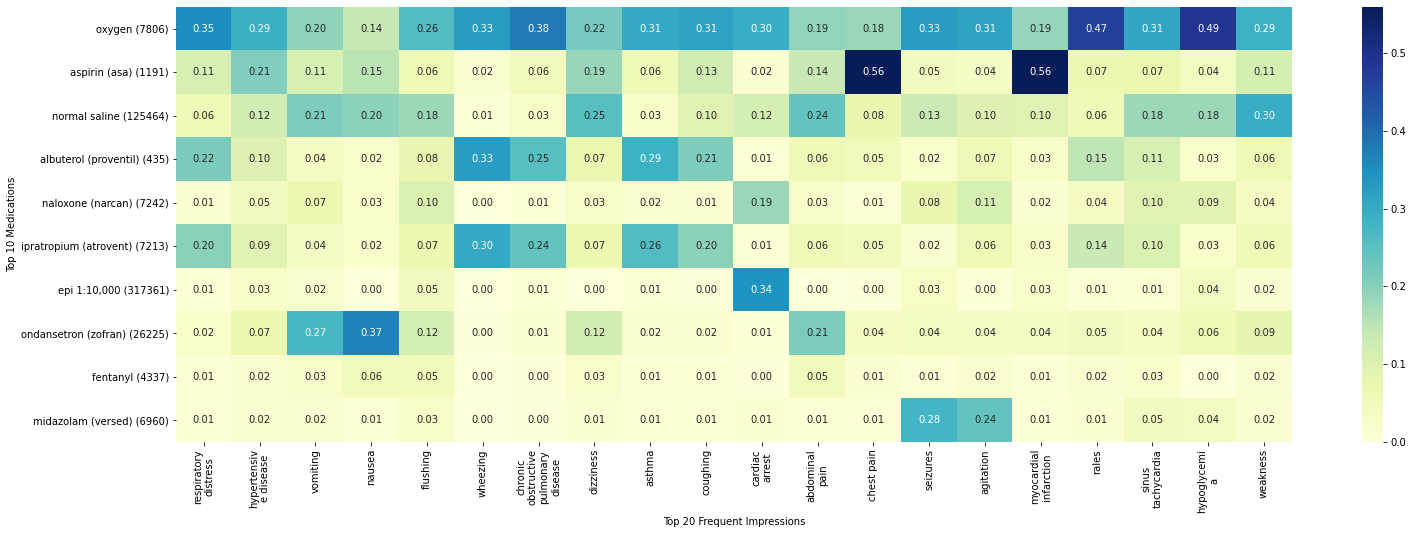

In [ ]:
fig, ax = plt.subplots(figsize=(25,8)) 

sns.heatmap(df, annot=True, fmt='.2f', cmap='YlGnBu')
ax.set_xticklabels([textwrap.fill(e, 11) for e in df.columns])

plt.xlabel('Top 20 Frequent Impressions')
plt.ylabel('Top 10 Medications')
plt.show()

##4. Conditional probability between different impressions and signs/symptoms

In [ ]:
impression_merge={
    'hypoglycemia - diabetic':'hypoglycemia',
    'hypoglycemia - non-diabetic':'hypoglycemia',
    'burn of body region unspecified degree':'burn',
    'burn - superficial':'burn',
    'burn - partial thickness':'burn',
    'burn - full thickness':'burn',
    'burn - unspecified location degree':'burn',
    'seizure with status epilepticus':'seizure',
    'cv - cardiac arrest/obvious death':'cardiac arrest',
    'weakness':'weakness',
    'gi/gu - nausea (without vomiting)':'nausea/vomiting',
    'nausea and vomiting':'nausea/vomiting',
    'vomiting':'nausea/vomiting',
    'ob - vomiting due to pregnancy':'nausea/vomiting',
    'fever':'fever',
    'neuro - stroke/cva':'stroke',
    'intracranial - stroke (cva) hemorrhagic':'stroke',
    'respiratory - copd exacerbation':'copd',
    'respiratory - asthma exacerbation':'asthma',
    'pain - abdominal generalized':'abdominal pain',
    'chest pain - angina':'chest pain - cardiac',
    'chest pain - stemi of inferior wall':'chest pain-stemi',
    'chest pain - stemi of other sites':'chest pain-stemi',
    'chest pain - stemi of anterior wall':'chest pain-stemi',
   'shock - anaphylactic':'allergic reaction',
   'pain - abdomen acute onset':'abdominal pain'
}


In [ ]:
impression_protocol_map={
    'asthma': 'asthma/copd/croup',
    #'cardiac arrest': 'cardiac arrest',
    #'chest pain-stemi': 'stemi',
    'copd': 'asthma/copd/croup',
    'fever': 'fever',
    #'hypertension': 'hypotension',
    'hypoglycemia': 'hypoglycemia',
    #'nausea/vomiting': 'nausea/vomiting',
    'seizure': 'seizure',
    'stroke': 'stroke',
    #'chest pain - cardiac':'chest pain',
    'allergic reaction':'allergic reaction',
    'abdominal pain':'abdominal pain',
    'altered mental status':'altered mental status',
    'infectious - sepsis':'sepsis',
    #'abuse of narcotic':'abuse of narcotic',
    'congestive heart failure (chf)':'congestive heart failure (chf)'
}


In [ ]:
for key in impression_protocol_map:
    impression_protocol_map[key]=text_remove_double_space(impression_protocol_map[key])

In [ ]:
DF = pd.read_excel(
    '/content/drive/My Drive/Research project/Data/narrative_impression.xlsx',
    names=['ID','narrative','impression'])
DF.set_index('ID',inplace=True)

In [ ]:
ID_Impression_map={}
for i in range(0,len(DF.index)):
    ID_Impression_map[DF.index[i]]=text_remove_double_space(DF.impression[i])

In [ ]:
metamap_file=[]
for each in metamap_file1:
    metamap_file.append(each)
for each in metamap_file2:
    metamap_file.append(each)

In [ ]:

def pre_process_impression(impression):
    res=""
    for impre in impression.split(';'):
        impre=impre.strip()
        if impre in impression_merge:
            impre=impression_merge[impre]
        if impre in impression_protocol_map:
            impre=impression_protocol_map[impre]
        if impre=='nausea and vomiting':
            res+='medical – nausea/vomiting (protocol 3 - 9);'
        res+=impre+';'
    return res[:-1]



In [ ]:
df_metamap=[]
df_impressions=[]
with tqdm(total=len(metamap_file),  bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    for i in range(0,len(metamap_file)):
        metamap=metamap_file[i]
        ID=metamap[0]
        if i>=21319:
            metamap_concept=createConceptListForEachData(metamap[2])
        else:
            metamap_concept=createConceptListForEachData(metamap[4])
        
        if len(metamap_concept.strip())==0 or (ID not in ID_Impression_map) or (type(ID_Impression_map[ID])==float):
            pbar.update(1)
            continue
        df_impressions.append(pre_process_impression(ID_Impression_map[ID]))
        df_metamap.append(metamap_concept)
        pbar.update(1)


In [ ]:
sign_symptom_idx_dict={}
idx_sign_symptom_dict={}
sign_symptom_cnt={}
i=0
for each in df_metamap:
    for sign in each.split(';'):
        if sign not in sign_symptom_idx_dict:
            sign_symptom_idx_dict[sign.strip()]=i
            idx_sign_symptom_dict[i]=sign.strip()
            i+=1
        if sign not in sign_symptom_cnt:
            sign_symptom_cnt[sign]=1
        else:
            sign_symptom_cnt[sign]+=1
sign_symptom_cnt={k: v for k, v in sorted(sign_symptom_cnt.items(), key=lambda item: item[1],reverse=True)}

impression_idx_dict={}
idx_impression_dict={}
impression_cnt={}
i=0
for each in df_impressions:
    for impression in each.split(';'):
        if impression not in impression_idx_dict:
            impression_idx_dict[impression.strip()]=i
            idx_impression_dict[i]=impression.strip()
            i+=1
        if impression not in impression_cnt:
            impression_cnt[impression]=1
        else:
            impression_cnt[impression]+=1
impression_cnt={k: v for k, v in sorted(impression_cnt.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
sign_symptom_arr=np.zeros((len(df_metamap),len(sign_symptom_idx_dict))) # data size x signs and symptoms size
impression_arr=np.zeros((len(df_impressions),len(impression_idx_dict)))
for i in range(0,len(df_metamap)):
    for impression in df_impressions[i].split(';'):
        impression=text_remove_double_space(impression).strip()
        impression_arr[i][impression_idx_dict[impression]]+=1
    
    for sign in df_metamap[i].split(';'):
        sign_symptom_arr[i][sign_symptom_idx_dict[sign.strip()]]+=1

In [ ]:
top_10_impression=[]
for key in impression_protocol_map:
    val=impression_protocol_map[key]
    if val not in top_10_impression:
        top_10_impression.append(val)

In [ ]:
#top_10_impression=['hypoglycemia','seizure','cardiac arrest','weakness','nausea/vomiting','fever','burn','asthma exacerbation','copd exacerbation','abdominal pain']
top_10_impression_idx={}
top_10_idx_impression={}
i=0
for i in range(0,len(top_10_impression)):
    top_10_impression_idx[top_10_impression[i]]=i
    top_10_idx_impression[i]=top_10_impression[i]

top_10_impression

['asthma/copd/croup',
 'fever',
 'hypoglycemia',
 'seizure',
 'stroke',
 'allergic reaction',
 'abdominal pain',
 'altered mental status',
 'sepsis',
 'congestive heart failure (chf)']

In [ ]:
sorted(impression_cnt.items(), key=lambda item: item[1],reverse=True)

[('altered mental status', 5554),
 ('chest pain - cardiac', 5512),
 ('asthma/copd/croup', 4330),
 ('weakness', 4032),
 ('respiratory distress - acute onset', 3031),
 ('nausea/vomiting', 2626),
 ('abdominal pain', 2594),
 ('pain - chest pain (non-cardiac)', 2334),
 ('abuse of narcotic', 2333),
 ('pain - not elsewhere mentioned sudden onset', 2296),
 ('malaise - sick person', 2253),
 ('seizure', 2064),
 ('respiratory disorder unspecified', 1830),
 ('anxiety disorder', 1683),
 ('general - examination no complaint (none)', 1473),
 ('syncopal episode', 1458),
 ('cardiac arrest', 1273),
 ('hypoglycemia', 1205),
 ('stroke', 1142),
 ('cardiac arrhythmia/dysrhythmia', 959),
 ('abuse of alcohol - intoxication', 854),
 ('hyperglycemia - diabetic', 841),
 ('injury - head', 836),
 ('headache', 772),
 ('fever', 754),
 ('pain - back', 730),
 ('hypotension', 726),
 ('sepsis', 716),
 ('hypertension', 631),
 ('infectious disease unspecified', 536),
 ('behavioral - strange and inexplicable behavior', 524

In [ ]:
impression_symptom_freq=np.zeros((len(top_10_impression_idx),len(sign_symptom_cnt)))

for impression in top_10_impression_idx:
    impre_arr=impression_arr[:,impression_idx_dict[impression]]
    i=top_10_impression_idx[impression]
    for k in range(0,len(impre_arr)):
        if impre_arr[k]==0:
            continue     
        for sign in sign_symptom_idx_dict:
            j=sign_symptom_idx_dict[sign]
            sign_arr=sign_symptom_arr[:,j]
            if sign_arr[k]!=0:
                    impression_symptom_freq[i][j]+=1

In [ ]:
sorted_prob={}
for i in range(0,len(impression_symptom_freq)):
    lis={}
    impression=top_10_idx_impression[i]
    #if impression =='abdominal pain':
     #   print(impression)
    for j in range(0,len(impression_symptom_freq[i])):
        sign=idx_sign_symptom_dict[j]
        #if np.sum(impression_symptom_freq[i,:])==0:
         #   lis[sign]=0
        #else:
       # print(impression_cnt[impression])
        lis[sign]=impression_symptom_freq[i][j]/impression_cnt[impression]
    print(impression)
    lis=sorted(lis.items(), key=lambda item: item[1],reverse=True)
    print(lis)
    #break
    l={}
    cnt=0
    for each in lis:
        if cnt==10:
            break
        if sign_symptom_cnt[each[0]]>10:
            l[each[0]]=each[1]
            cnt+=1
    sorted_prob[impression]=l


asthma/copd/croup
[('respiratory distress', 0.6108545034642032), ('wheezing', 0.49214780600461894), ('chronic obstructive pulmonary disease', 0.2706697459584296), ('asthma', 0.2397228637413395), ('coughing', 0.14665127020785218), ('wiskottaldrich syndrome', 0.13371824480369515), ('short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome', 0.12609699769053118), ('hypertensive disease', 0.11062355658198614), ('sinus tachycardia', 0.1046189376443418), ('disease', 0.09953810623556582), ('degenerative polyarthritis', 0.08752886836027714), ('chest pain', 0.0859122401847575), ('symptoms', 0.0720554272517321), ('polydactyly postaxial with progressive myopia', 0.06997690531177829), ('premenstrual syndrome', 0.06997690531177829), ('congestive heart failure', 0.06628175519630485), ('pain', 0.061200923787528866), ('microcephaly epilepsy and diabetes syndrome', 0.0605080831408776), ('upper respiratory infections', 0.05103926096997691), ('flushing', 0.05057736720554273), ('common 

In [ ]:
from pathlib import PureWindowsPath
for each in d:
    print(each)
    cnt=0
    s=""
    for sign in d[each]:
        if cnt==10:
            break
        s+=sign+', '
    print(s)

asthma/copd/croup
respiratory distress, wheezing, chronic obstructive pulmonary disease, asthma, coughing, wiskottaldrich syndrome, short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome, hypertensive disease, sinus tachycardia, disease, 
fever
respiratory distress, weakness, sinus tachycardia, coughing, wiskottaldrich syndrome, pain, vomiting, short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome, nausea, abdominal pain, 
hypoglycemia
hypoglycemia, diabetes, hypertensive disease, confusion, ablepharonmacrostomia syndrome, short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome, wiskottaldrich syndrome, weakness, disease, pain, 
seizure
seizure, tremor, wiskottaldrich syndrome, confusion, ablepharonmacrostomia syndrome, sinus tachycardia, short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome, pain, cerebrovascular accident, disease, 
stroke
cerebrovascular accident, facial paresis, weakness, wiskottald

In [ ]:
d['abuse of narcotic']

{'ablepharonmacrostomia syndrome': 0.12344620660094299,
 'disease': 0.09215602228889841,
 'flushing': 0.08358336905272182,
 'pain': 0.13073296185169309,
 'pallor': 0.07715387912558937,
 'short stature onychodysplasia facial dysmorphism and hypotrichosis syndrome': 0.15130732961851692,
 'sinus tachycardia': 0.14273467638234033,
 'snoring': 0.09987141020145734,
 'vomiting': 0.09601371624517788,
 'wiskottaldrich syndrome': 0.1594513501928847}

In [ ]:
considered_sign_symptom_list=['respiratory distress', 'vomiting','nausea','dizziness', 'pruritus', 'hypertensive disease', 'coughing','cerebrovascular accident','wheezing','chest pain','confusion','ablepharonmacrostomia syndrome','hypoglycemia','diarrhea','facial paresis','weakness','urticaria','sinus tachycardia','diabetes','tremor']
data=[]

for sign in considered_sign_symptom_list:
    col_idx=sign_symptom_idx_dict[sign]
    #print(col_idx)
    each={}
    for impression in top_10_impression:
        row_idx=top_10_impression_idx[impression]
        each[impression]=impression_symptom_freq[row_idx][col_idx]/impression_cnt[impression]
    
    data.append(each)


In [ ]:
top_10_impression

['asthma/copd/croup',
 'cardiac arrest',
 'fever',
 'hypoglycemia',
 'seizure',
 'stroke',
 'allergic reaction',
 'abdominal pain',
 'altered mental status',
 'sepsis',
 'abuse of narcotic',
 'congestive heart failure (chf)']

In [ ]:
row_name=[]
for each in considered_sign_symptom_list :
    row_name.append(each)
df= pd.DataFrame(data, index =row_name)  


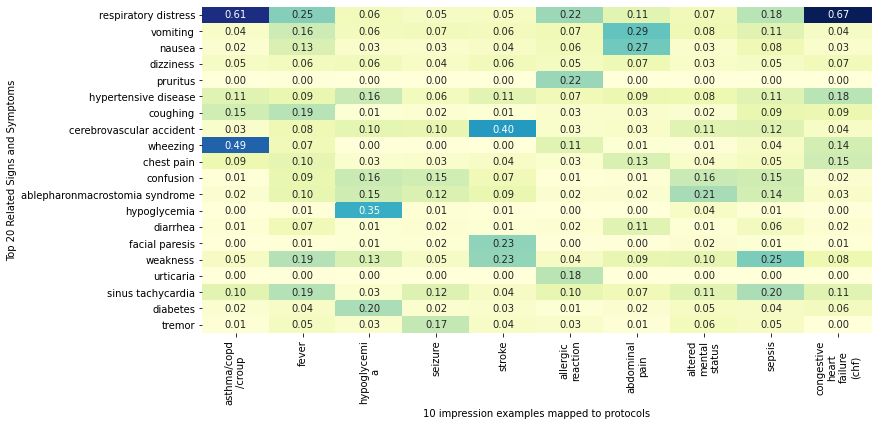

In [ ]:
fig, ax = plt.subplots(figsize=(12,6)) 

sns.heatmap(df, annot=True, fmt='.2f', cmap='YlGnBu',cbar=False)
ax.set_xticklabels([textwrap.fill(e, 11) for e in df.columns])

plt.xlabel('10 impression examples mapped to protocols')
plt.ylabel('Top 20 Related Signs and Symptoms')
plt.savefig('/content/drive/My Drive/Research project/impression_signs_symptoms.png')